In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
# Load the dataset
df = pd.read_csv("DigitalExposome Dataset.csv")

# Features: all columns except 'Label'
X = df.drop('Label', axis=1)
# Target: 'Label'
y = df['Label']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Class distribution:\n", y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'KNeighbors': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVC': SVC(probability=True)
}

param_grids = {
    'LogisticRegression': {'C': [0.1, 1, 10]},
    'KNeighbors': {'n_neighbors': [3, 5, 7]},
    'DecisionTree': {'max_depth': [3, 5, 7]},
    'RandomForest': {'n_estimators': [50, 100], 'max_depth': [3, 5, 7]},
    'GradientBoosting': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]},
    'AdaBoost': {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]},
    'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
}
results = {}

print("\nModel Accuracies (Percentages):")
for name in models:
    grid = GridSearchCV(models[name], param_grids[name], cv=3, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    percentage = acc * 100
    results[name] = {
        'best_params': grid.best_params_,
        'accuracy': acc,
        'percentage': percentage,
        'model': best_model
    }
    print(f"{name}: {percentage:.2f}% (Best Params: {grid.best_params_})")

summary = True
if summary == True:
    best_model_name = max(results, key=lambda x: results[x]['accuracy'])
    best_accuracy = results[best_model_name]['accuracy']
    best_params = results[best_model_name]['best_params']

    print("\n" + "="*50)
    print(f"Best Model: {best_model_name}")
    print(f"Accuracy: {best_accuracy*100:.2f}%")
    print(f"Best Parameters: {best_params}")
    print("="*50)

    best_model = results[best_model_name]['model']
    print(f"Best model object: {best_model}")


Features shape: (42436, 11)
Target shape: (42436,)
Class distribution:
 Label
5    16153
1     9048
2     6347
4     5979
3     4909
Name: count, dtype: int64
Train set shape: (33948, 11)
Test set shape: (8488, 11)

Model Accuracies (Percentages):
LogisticRegression: 48.54% (Best Params: {'C': 10})
KNeighbors: 95.00% (Best Params: {'n_neighbors': 3})
DecisionTree: 67.57% (Best Params: {'max_depth': 7})
RandomForest: 74.65% (Best Params: {'max_depth': 7, 'n_estimators': 100})
GradientBoosting: 80.42% (Best Params: {'learning_rate': 0.1, 'n_estimators': 100})
AdaBoost: 43.52% (Best Params: {'learning_rate': 0.1, 'n_estimators': 100})
SVC: 88.42% (Best Params: {'C': 10, 'kernel': 'rbf'})

Best Model: KNeighbors
Accuracy: 95.00%
Best Parameters: {'n_neighbors': 3}
Best model object: KNeighborsClassifier(n_neighbors=3)


In [5]:
import joblib
joblib.dump(best_model, 'best_knn_model.pkl')

['best_knn_model.pkl']

In [8]:
best_knn = results['KNeighbors']['model']
sample = X_test.iloc[[0]]
sample_scaled = scaler.transform(sample)
prediction = best_knn.predict(sample_scaled)
print("Prediction:", prediction[0])




Prediction: 4


In [9]:
# Example of a new custom input — must match the number and order of features (11 in your case)
new_data = [[0.5, -1.2, 3.4, 0.0, 1.1, 2.2, -0.7, 4.5, 3.3, 2.1, -1.1]]

# Scale using the previously fitted scaler
new_data_scaled = scaler.transform(new_data)

# Predict using the trained model
custom_prediction = best_knn.predict(new_data_scaled)
print("Custom input prediction:", custom_prediction[0])

Custom input prediction: 2


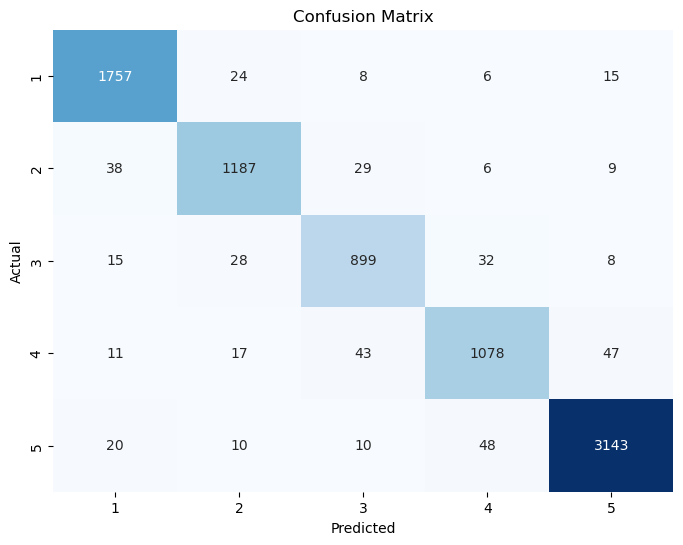

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the predictions for the test set
y_pred = best_knn.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [12]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.95      0.97      0.96      1810
           2       0.94      0.94      0.94      1269
           3       0.91      0.92      0.91       982
           4       0.92      0.90      0.91      1196
           5       0.98      0.97      0.97      3231

    accuracy                           0.95      8488
   macro avg       0.94      0.94      0.94      8488
weighted avg       0.95      0.95      0.95      8488



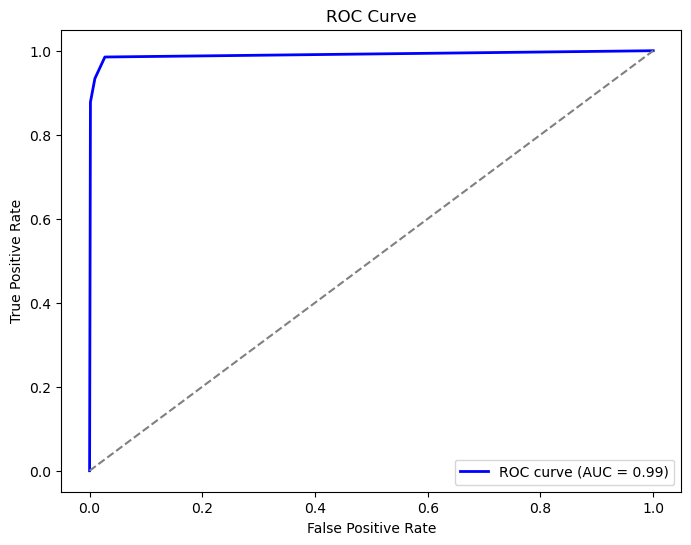

In [13]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities for the positive class
y_probs = best_knn.predict_proba(X_test_scaled)

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1], pos_label=2)  # Change the label as per the class
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
